In [18]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from helper import *
import os

In [2]:
with open('config.json') as config_file:
    config = json.load(config_file)
data_path = config['data_path']

file_id: 19
/scratch3/hle/refCOCO/imgs_by_id/358741.jpg
{'ref_sents': ['cow at the back', 'cow in back of other', 'part of cow far left'], 'label': 21, 'bbox': [[2.319999933242798, 78.97000122070312, 359.0, 281.0299987792969]]}


,box_alias,image_id,ann_id,ref_id,salience,x1,y1,w,h,TYPE_yolk,...,ATTR_thin,ATTR_decorative,ATTR_wrinkled,ATTR_peeling,ATTR_golden,ATTR_metallic,ATTR_back,ATTR_thick,ATTR_black and white,ATTR_leaning
0,ear-1,358741,71896,19167,0.014334,518.077026,119.468216,49.674133,66.484924,0.000624,...,0.002499,0.002494,0.002496,0.002494,0.002495,0.002494,0.002508,0.002499,0.002495,0.002494
1,nose-1,358741,71896,19167,0.005124,338.880096,240.950592,36.599121,32.255432,0.000624,...,0.002493,0.002492,0.002492,0.002492,0.002492,0.002492,0.002493,0.002493,0.002492,0.002492
2,ear-2,358741,71896,19167,0.016498,340.251953,117.810997,63.283295,60.064384,0.000624,...,0.002501,0.002494,0.002497,0.002494,0.002494,0.002494,0.002500,0.002497,0.002495,0.002494
3,fence-1,358741,71896,19167,0.071415,0.000000,11.643703,358.094940,45.948559,0.000624,...,0.002503,0.002494,0.002494,0.002494,0.002493,0.002504,0.002495,0.002499,0.002494,0.002496
4,eye-1,358741,71896,19167,0.003243,459.831055,177.124786,33.440399,22.342178,0.000624,...,0.002493,0.002493,0.002493,0.002493,0.002493,0.002493,0.002494,0.002494,0.002493,0.002493
5,dog-1,358741,71896,19167,0.289378,235.415512,125.570259,286.292786,232.882507,0.000624,...,0.002494,0.002493,0.002503,0.002493,0.002496,0.002493,0.002495,0.002496,0.002494,0.002494
6,head-1,358741,71896,19167,0.255026,301.701721,68.615410,246.821350,238.058990,0.000624,...,0.002495,0.002494,0.002498,0.002494,0.002497,0.002494,0.002496,0.002496,0.002496,0.002495
7,cow-1,358741,71896,19167,0.367712,90.970085,74.478195,301.895813,280.629395,0.000624,...,0.002494,0.002493,0.002505,0.002493,0.002497,0.002493,0.002495,0.002497,0.002494,0.002494
8,grass-1,358741,71896,19167,0.272046,441.784271,34.999905,198.215729,316.217865,0.000624,...,0.002493,0.002492,0.002493,0.002492,0.002493,0.002492,0.002493,0.002505,0.002492,0.002492
9,field-1,358741,71896,19167,0.271350,440.132904,34.692921,199.867096,312.803162,0.000624,...,0.002493,0.002492,0.002493,0.002492,0.002493,0.002492,0.002493,0.002505,0.002492,0.002492


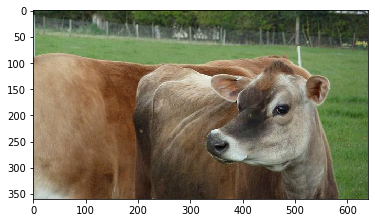

In [3]:
file_id = 19
print(f'file_id: {file_id}')
df = pd.read_csv(os.path.join(data_path,f'refCOCO/attr_tables/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')
img_id = df['image_id'][0]
filename = os.path.join(data_path, f'refCOCO/imgs_by_id/{img_id}.jpg')
print(filename)
image = plt.imread(filename)
plt.imshow(image)
with open(os.path.join(data_path,f'refCOCO/labels/lab_{file_id}.json')) as json_file:
    label = json.load(json_file)
print(label)

df

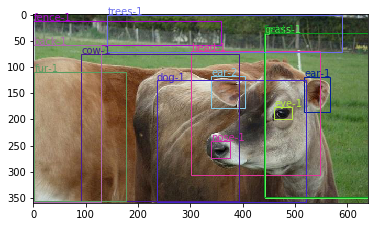

In [4]:
box_data = df[['box_alias', 'x1','y1','w','h']]
fig,ax = plt.subplots(1)
img = image

ax.imshow(img)
rng = [i for i in range(len(box_data))]
for i in rng[:]:
    name, x,y,w,h = list(box_data.iloc[i,:])
    ax = draw_box_obj(name,x,y,w,h,img,ax)

['cow at the back', 'cow in back of other', 'part of cow far left']


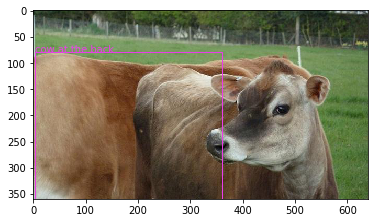

In [5]:
# DRAWING THE BOX OF THE TRUE LABEL AND PRINT THE TRUE LABELS (REFCOCO)
print(label['ref_sents'])
bbox = label['bbox'][0]
sentence = label['ref_sents'][0]
fig,ax_true_label = plt.subplots(1)
ax_true_label.imshow(img)
draw_box_obj(sentence,bbox[0],bbox[1],bbox[2],bbox[3],img,ax_true_label)

In [6]:
# RETURN THE TOP 5 MATCH TO THE TARGET LABEL
top_5 = top_5_match(box_data, bbox)
print(top_5)

[[7, 'cow-1', 0.6728181580932334], [11, 'fur-1', 0.4221080622028027], [12, 'back-1', 0.33784256480713637], [5, 'dog-1', 0.2120996541705207], [6, 'head-1', 0.09293568218180233]]


In [17]:
synsets = wordnet.synsets('cow')
synonyms = []
for syn in synsets:
    for l in syn.lemmas(): 
        synonyms.append(l.name())
print(synonyms)

['cow', 'moo-cow', 'cow', 'cow', 'overawe', 'cow']


In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/grad3/hle/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True